    # Flood Adaptation: Minimal Model

This python script outlines a basic Agent-Based Model (ABM) developed using the Mesa framework, designed as a simplified representation of household adaptation to flood events in a social network context. The model serves as a template for understanding the fundamental mechanics of flood adapdtation with a given social network.

This directory is structured as follows:
 - A Mesa Agent class `Households` is defined in `agents.py`
 - A Mesa Agent class `Government` is defined in `agents.py` (this agent currently does not perform any action)
 - A Mesa Model class `AdaptationModel` is defined in `model.py`
 - This notebook `demo.ipynb` provides a demonstration of the model and its visualization.

Each household agent in the model represents a household with attributes and behaviors that determine its response to flood events. The flood depth attribute assigned to each household is currently random for demonstration purposes. The decision by each household to adapt is also arbitrary. In a more comprehensive model, this could be replaced with more sophisticated decision-making algorithms.

The current implementation includes several simplifications and arbitrary choices, such as random flood depths and basic adaptation logic based on random thresholds. These aspects are designed for clarity and ease of understanding and should be replaced with realistic and sound choices.

You are encouraged to modify, expand, and customize the model. This might include integrating real-world data, implementing more complex decision-making processes for agents, or exploring different network topologies and their effects on social dynamics.

The visualisation provided is basic. Additional aspects can be added for visualization and more in-depth analysis.

_This notebook was tested on 2023-11-13 with Mesa version 2.1.4 on Python 3.12.0._

# Running the model and visualizing the model domain and social network over time

C:\Users\31646\anaconda3\Lib\site-packages\mesa\time.py:82: FutureWarning: The AgentSet is experimental. It may be changed or removed in any and all future releases, including patch releases.
We would love to hear what you think about this new feature. If you have any thoughts, share them with us here: https://github.com/projectmesa/mesa/discussions/1919
  self._agents: AgentSet = AgentSet(agents, model)


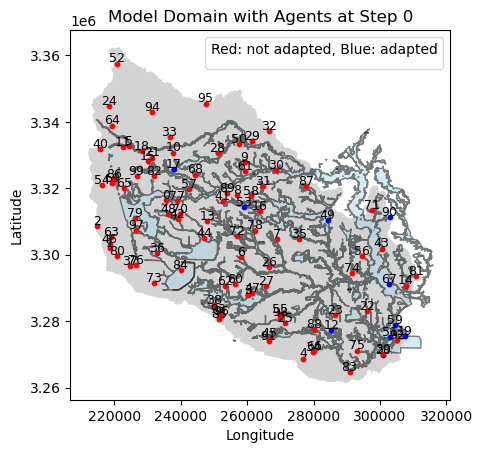

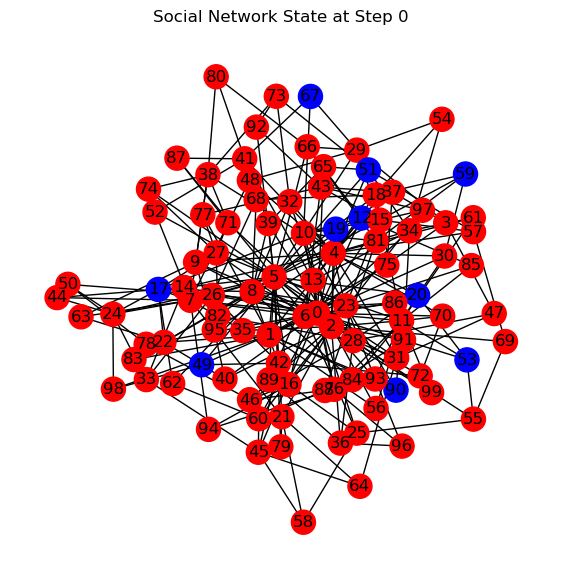

In [1]:
from model import AdaptationModel
from mesa.batchrunner import batch_run
import matplotlib.pyplot as plt
import networkx as nx


# Initialize the Adaptation Model with 50 household agents.
model = AdaptationModel(seed = 3, number_of_households=100, flood_map_choice="harvey", network="barabasi_albert", gov_action_A_sub = True, gov_action_B_awa = True,) # flood_map_choice can be "harvey", "100yr", or "500yr"

# Calculate positions of nodes for the network plot.
# The spring_layout function positions nodes using a force-directed algorithm,
# which helps visualize the structure of the social network.
pos = nx.spring_layout(model.G)


#*******************ORIGINAL CODE
def plot_network(ax, model):
    # Clear the current axes.
    ax.clear()
    # Determine the color of each node (agent) based on their adaptation status.
    colors = ['blue' if agent.is_adapted else 'red' for agent in model.schedule.agents]
    # Draw the network with node colors and labels.
    nx.draw(model.G, pos, node_color=colors, with_labels=True, ax=ax)
    # Set the title of the plot with the current step number.
    ax.set_title(f"Social Network State at Step {model.schedule.steps}", fontsize=12)

#*******************ORIGINAL CODE   


    
# Generate the initial plots at step 0.
# Plot the spatial distribution of agents. This is a function written in the model.py
model.plot_model_domain_with_agents()

# Plot the initial state of the social network.
fig, ax = plt.subplots(figsize=(7, 7))
plot_network(ax, model)
plt.show()

# Run the model for 20 steps and generate plots every 5 steps.
for step in range(6):       #6
    
    model.step()

    # if (step + 1) % 40 == 5:
    #     # Plot for the spatial map showing agent locations and adaptation status.
    #     plt.figure(figsize=(10, 6))
    #     
    #     model.plot_model_domain_with_agents()
    # 
    #     # Plot for the social network showing connections and adaptation statuses.
    #     fig, ax = plt.subplots(figsize=(7, 7))
    #     plot_network(ax, model)
    #     plt.show()
    if step == 7:   
        # Define the size of the overall figure and the layout of subplots (1 row, 2 columns)
        fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 7)) # Adjust figsize as needed
        # First subplot for the model domain with agents
        model.plot_model_domain_with_agents(ax=axes[0])  # Pass the first axis to the function
        # Second subplot for the social network
        plot_network(axes[1], model)  # Pass the second axis to your plot_network function
        # Show the combined plot
        plt.show()

        


In [2]:
model_data = model.datacollector.get_model_vars_dataframe()
model_data  

,percentage_adapted_households,Average initial flood damage estimated,Average flood damage estimated,Average flood damage actual
0,0.10,0.473964,0.469465,0.0
1,0.26,0.473964,0.454048,0.0
2,0.26,0.473964,0.454048,0.0
3,0.26,0.473964,0.454048,0.0
4,0.26,0.473964,0.454048,0.0
5,0.26,0.473964,0.454048,0.0


In [3]:
## ALL HOUSEHOLDS
agent_data = model.datacollector.get_agent_vars_dataframe()
agent_data

FloodDepthEstimated  InitialFloodDamageEstimated  \
Step AgentID                                                     
0    0                   3.046547                     0.842806   
     1                   0.249535                     0.405928   
     2                   0.000000                     0.000000   
     3                   1.825572                     0.753391   
     4                   0.334468                     0.457076   
...                           ...                          ...   
5    95                  0.000000                     0.000000   
     96                  0.249815                     0.406124   
     97                  0.239864                     0.399027   
     98                  0.976475                     0.683104   
     99                  0.589737                     0.556097   

              FloodDamageEstimated  FloodDepthActual  FloodDamageActual  \
Step AgentID                                                              
0    0                    0.842806                 0                  0   
     1                    0.405928                 0                  0   
     2                    0.000000                 0                  0   
     3                    0.753391                 0                  0   
     4                    0.457076                 0                  0   
...                            ...               ...                ...   
5    95                   0.000000                 0                  0   
     96                   0.406124                 0                  0   
     97                   0.399027                 0                  0   
     98                   0.644143                 0                  0   
     99                   0.556097                 0                  0   

             IncomeClass  IsAdapted  
Step AgentID                         
0    0             upper      False  
     1             upper      False  
     2             upper      False  
     3             upper      False  
     4             upper      False  
...                  ...        ...  
5    95            lower      False  
     96            lower      False  
     97            lower      False  
     98            lower       True  
     99            lower      False  

[600 rows x 7 columns]

In [4]:
# Input variables
params = {
    "number_of_households": 100,                                            # 100 households will be placed on the map            
    "flood_map_choice": "harvey",                                           # The model will run a simulation of Hurricane Harvey
    "network": "barabasi_albert",                                           # Households will be connected by the barabasi albert network
    "seed": range(100),                                                      # The model will be run with 10 different seeds
    "gov_action_A_sub": [False, True],                                      # Government actions will be varied for the experiments.
    "gov_action_B_awa": [False, True]
}

results = batch_run(
    AdaptationModel,
    parameters=params,                                           
    iterations=1,                                                           # Number of times to run the simulation for each set of parameters
    max_steps=5,                                                            # Maximum number of steps per simulation, equal to the 5 years we are modelling
    number_processes=None,                                                  # Can be set to run simulations in parallel, not used in this research
    data_collection_period=1,                                              # Collecting data for every step
    display_progress=True           
)

  0%|          | 0/400 [00:00<?, ?it/s]

In [5]:
import pandas as pd
df = pd.DataFrame.from_dict(results)
df

,RunId,iteration,Step,number_of_households,flood_map_choice,network,seed,gov_action_A_sub,gov_action_B_awa,percentage_adapted_households,...,Average flood damage estimated,Average flood damage actual,AgentID,FloodDepthEstimated,InitialFloodDamageEstimated,FloodDamageEstimated,FloodDepthActual,FloodDamageActual,IncomeClass,IsAdapted
0,2,0,0,100,harvey,barabasi_albert,0,True,False,0.11,...,0.463583,0.000000,0,1.488928,0.717801,0.717801,0.000000,0.000000,upper,False
1,2,0,0,100,harvey,barabasi_albert,0,True,False,0.11,...,0.463583,0.000000,1,0.000000,0.000000,0.000000,0.000000,0.000000,upper,False
2,2,0,0,100,harvey,barabasi_albert,0,True,False,0.11,...,0.463583,0.000000,2,0.163548,0.492145,0.332160,0.000000,0.000000,upper,True
3,2,0,0,100,harvey,barabasi_albert,0,True,False,0.11,...,0.463583,0.000000,3,3.046547,0.842806,0.842806,0.000000,0.000000,upper,False
4,2,0,0,100,harvey,barabasi_albert,0,True,False,0.11,...,0.463583,0.000000,4,0.249535,0.405928,0.405928,0.000000,0.000000,upper,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
439995,399,0,10,100,harvey,barabasi_albert,99,True,True,0.87,...,0.410306,0.409277,95,0.472237,0.556263,0.517302,0.531718,0.538015,lower,True
439996,399,0,10,100,harvey,barabasi_albert,99,True,True,0.87,...,0.410306,0.409277,96,0.148041,0.353728,0.314767,0.153697,0.321314,lower,True
439997,399,0,10,100,harvey,barabasi_albert,99,True,True,0.87,...,0.410306,0.409277,97,0.490530,0.562899,0.523938,0.519844,0.534072,lower,True
439998,399,0,10,100,harvey,barabasi_albert,99,True,True,0.87,...,0.410306,0.409277,98,0.714685,0.628610,0.589650,0.726085,0.592413,lower,True


In [6]:
df.to_csv('C:/Users/31646/Documents/EPA MASTER/Q2/ABM/EXPERIMENTEN/modelrun6.csv', index=False)

In [7]:
# FINDING SPECIFIC HOUSEHOLD
agent_data = model.datacollector.get_agent_vars_dataframe()
specific_agent_data = agent_data.xs(1, level='AgentID')
specific_agent_data

,FloodDepthEstimated,InitialFloodDamageEstimated,FloodDamageEstimated,FloodDepthActual,FloodDamageActual,IncomeClass,IsAdapted
Step,,,,,,,
0,0.249535,0.405928,0.405928,0,0,upper,False
1,0.249535,0.405928,0.405928,0,0,upper,False
2,0.249535,0.405928,0.405928,0,0,upper,False
3,0.249535,0.405928,0.405928,0,0,upper,False
4,0.249535,0.405928,0.405928,0,0,upper,False
5,0.249535,0.405928,0.405928,0,0,upper,False


In [8]:
## ALL HOUSEHOLDS
agent_data = model.datacollector.get_agent_vars_dataframe()
agent_data

FloodDepthEstimated  InitialFloodDamageEstimated  \
Step AgentID                                                     
0    0                   3.046547                     0.842806   
     1                   0.249535                     0.405928   
     2                   0.000000                     0.000000   
     3                   1.825572                     0.753391   
     4                   0.334468                     0.457076   
...                           ...                          ...   
5    95                  0.000000                     0.000000   
     96                  0.249815                     0.406124   
     97                  0.239864                     0.399027   
     98                  0.976475                     0.683104   
     99                  0.589737                     0.556097   

              FloodDamageEstimated  FloodDepthActual  FloodDamageActual  \
Step AgentID                                                              
0    0                    0.842806                 0                  0   
     1                    0.405928                 0                  0   
     2                    0.000000                 0                  0   
     3                    0.753391                 0                  0   
     4                    0.457076                 0                  0   
...                            ...               ...                ...   
5    95                   0.000000                 0                  0   
     96                   0.406124                 0                  0   
     97                   0.399027                 0                  0   
     98                   0.644143                 0                  0   
     99                   0.556097                 0                  0   

             IncomeClass  IsAdapted  
Step AgentID                         
0    0             upper      False  
     1             upper      False  
     2             upper      False  
     3             upper      False  
     4             upper      False  
...                  ...        ...  
5    95            lower      False  
     96            lower      False  
     97            lower      False  
     98            lower       True  
     99            lower      False  

[600 rows x 7 columns]

In [9]:
model_data = model.datacollector.get_model_vars_dataframe()
model_data  

,percentage_adapted_households,Average initial flood damage estimated,Average flood damage estimated,Average flood damage actual
0,0.10,0.473964,0.469465,0.0
1,0.26,0.473964,0.454048,0.0
2,0.26,0.473964,0.454048,0.0
3,0.26,0.473964,0.454048,0.0
4,0.26,0.473964,0.454048,0.0
5,0.26,0.473964,0.454048,0.0


In [10]:
## PRINTING AVERAGE FLOOD DAMAGES

# Check if 'FloodDamageEstimated' is in the DataFrame columns
if 'FloodDamageEstimated' in agent_data.columns:
    # Calculate the average of the 'FloodDamageEstimated' column
    average_flood_damage_estimated = agent_data['FloodDamageEstimated'].mean()
    print("Average Flood Damage Estimated:", average_flood_damage_estimated)
else:
    print("'FloodDamageEstimated' column not found in the data.")
   



Average Flood Damage Estimated: 0.4566172171598005


In [11]:
model_data = model.datacollector.get_model_vars_dataframe()
model_data

,percentage_adapted_households,Average initial flood damage estimated,Average flood damage estimated,Average flood damage actual
0,0.10,0.473964,0.469465,0.0
1,0.26,0.473964,0.454048,0.0
2,0.26,0.473964,0.454048,0.0
3,0.26,0.473964,0.454048,0.0
4,0.26,0.473964,0.454048,0.0
5,0.26,0.473964,0.454048,0.0


In [12]:
import pandas as pd 
from agents import Households


# Assuming you have a list of agents in your model
agents = model.schedule.agents

# Record initial flood damage
initial_flood_damage = {agent.unique_id: agent.flood_damage_estimated for agent in agents if isinstance(agent, Households)}

# Run the model steps where agents buy protection
# (Your model execution logic here)

# Record post-protection flood damage
post_protection_flood_damage = {agent.unique_id: agent.flood_damage_estimated for agent in agents if isinstance(agent, Households)}

# Create a DataFrame
flood_damage_df = pd.DataFrame({
    'Agent ID': initial_flood_damage.keys(),
    'Initial Flood Damage': initial_flood_damage.values(),
    'Flood Damage After Protection': post_protection_flood_damage.values()
})

# Output the DataFrame
flood_damage_df


,Agent ID,Initial Flood Damage,Flood Damage After Protection
0,0,0.842806,0.842806
1,1,0.405928,0.405928
2,2,0.000000,0.000000
3,3,0.593406,0.593406
4,4,0.457076,0.457076
...,...,...,...
95,95,0.000000,0.000000
96,96,0.406124,0.406124
97,97,0.399027,0.399027
98,98,0.644143,0.644143


In [13]:
from agents import Households
import pandas as pd

# Retrieve information about agents, adaptation status, and danger status
agents_info = [(agent.income_class, agent.is_adapted) for agent in model.schedule.agents if isinstance(agent, Households)]

# Create a DataFrame from the collected information
agent_info_table = pd.DataFrame(agents_info, columns=['Income Class', 'Adapted'])

# Create a multi-level column structure
table = agent_info_table.groupby('Income Class').apply(
    lambda x: pd.Series({
        ('Adapted', 'True'): sum(x['Adapted']),
        ('Adapted', 'False'): sum(~x['Adapted']),
   
    })
).fillna(0).astype(int)

# Calculate total count of adapted agents
total_adapted = agent_info_table[agent_info_table['Adapted']].shape[0]

# # Print total count of adapted agents
print(f"\nTotal Adapted Agents: {total_adapted}")
table




Total Adapted Agents: 62


Adapted      
                True False
Income Class              
lower             14     6
lower-middle      11     4
middle            19    11
upper              2     3
upper-middle      16    14

In [14]:
# from model import AdaptationModel
# 
# 
# model = AdaptationModel(number_of_households=20, flood_map_choice="harvey", network="watts_strogatz") # flood_map_choice can be "harvey", "100yr", or "500yr"
# # Print the network
# print("Network:", model.G)

Average flood depth estimated, and how it changes from step 0 to step 5 -> see what the adaptions have had an impact on and how much class impacts etc